In [1]:
import torch.nn as nn
import torch
USE_CUDA = torch.cuda.is_available()
DEVICE = torch.device("cuda" if USE_CUDA else "cpu")

In [2]:
#생성모델
class Generator(nn.Module):
    def __init__(self):
        super().__init__()

        self.model = nn.Sequential(
            nn.Linear(100, 200),
            nn.LeakyReLU(0.02),
            nn.LayerNorm(200),
            nn.Linear(200, 784),
            nn.Sigmoid()
        )

        self.optimiser = torch.optim.Adam(self.parameters(), lr=0.0001)
        self.counter = 0
        self.progress = []

    def forward(self, inputs):
        return self.model(inputs.to(DEVICE))
    
    def train(self, D, inputs, targets):
        g_output = self.forward(inputs.to(DEVICE))
        
        d_output = D.forward(g_output)

        loss = D.loss_function(d_output, targets.to(DEVICE))
        self.counter += 1
        if self.counter % 10 == 0:
            self.progress.append(loss.item())

        self.optimiser.zero_grad()
        loss.backward()
        self.optimiser.step()
    
    def plot_progress(self):
        df = pd.DataFrame(self.progress, columns=['loss'])
        df.plot(ylim=(0), figsize=(16,8), alpha=0.1, marker='.', grid=True,
                yticks=(0, 0.25, 0.5, 1.0, 5.0))

In [3]:
G = torch.load('final_G.h5')
G.to(DEVICE)

Generator(
  (model): Sequential(
    (0): Linear(in_features=100, out_features=200, bias=True)
    (1): LeakyReLU(negative_slope=0.02)
    (2): LayerNorm((200,), eps=1e-05, elementwise_affine=True)
    (3): Linear(in_features=200, out_features=784, bias=True)
    (4): Sigmoid()
  )
)

In [4]:
#학습된 가중치 확인
print(G.model[3].weight[0][:10])
print(G.model[3].bias[:10])

tensor([ 0.2456, -0.0422,  0.1548, -0.1060,  0.1651, -0.0244,  0.2556,  0.0034,
        -0.0583, -0.0716], device='cuda:0', grad_fn=<SliceBackward0>)
tensor([-0.3408, -0.2464, -0.3475, -0.2951, -0.2623, -0.3313, -0.3305, -0.3461,
        -0.3382, -0.3561], device='cuda:0', grad_fn=<SliceBackward0>)


In [5]:
#랜덤 이미지 생성 함수
def generate_random_seed(size):
    random_data = torch.randn(size)
    return random_data

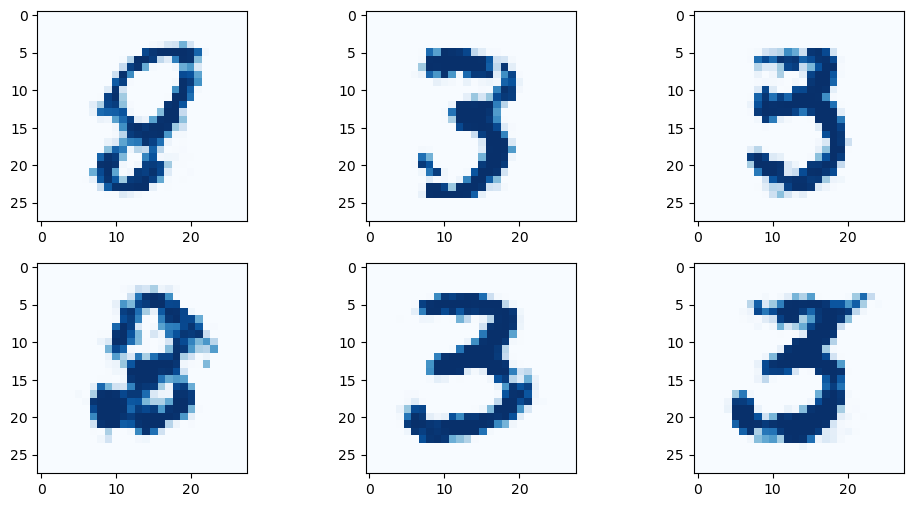

In [22]:
import os
import matplotlib.pyplot as plt
os.environ['KMP_DUPLICATE_LIB_OK']='True'
f, axarr = plt.subplots(2,3, figsize=(12,6))
for i in range(2):
    for j in range(3):
        output = G.forward(generate_random_seed(100))
        img = output.cpu().detach().numpy().reshape(28,28)
        axarr[i, j].imshow(img, interpolation='none', cmap='Blues')
        pass
    pass

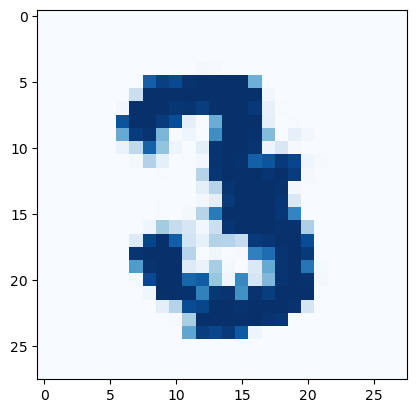

In [30]:
seed1 = generate_random_seed(100)
out1 = G.forward(seed1)
img1 = out1.cpu().detach().numpy().reshape(28,28)
plt.imshow(img1, cmap='Blues')
plt.show()

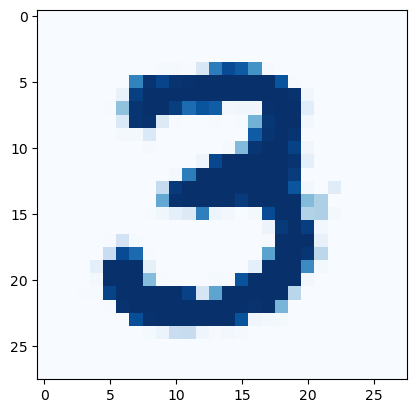

In [33]:
seed2 = generate_random_seed(100)
out2 = G.forward(seed2)
img2 = out2.cpu().detach().numpy().reshape(28,28)
plt.imshow(img2, cmap='Blues')
plt.show()

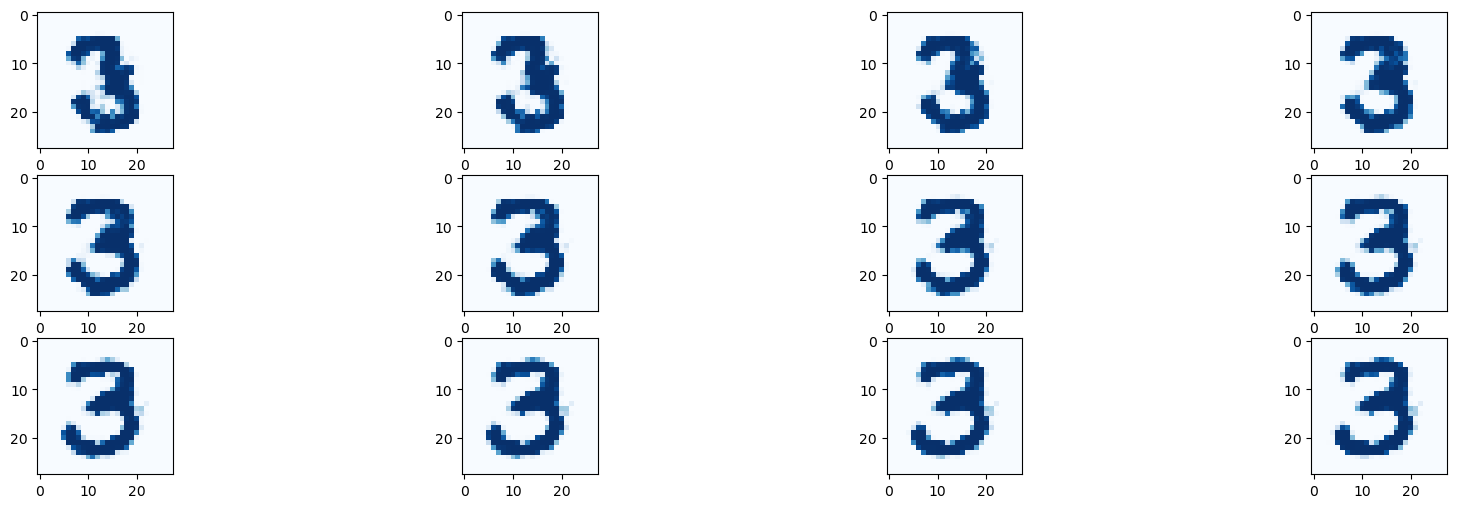

In [34]:
count = 0
f, axarr = plt.subplots(3,4, figsize=(21,6))
for i in range(3):
    for j in range(4):
        seed = seed1 + (seed2 - seed1) / 11 * count
        output = G.forward(seed)
        img = output.cpu().detach().numpy().reshape(28,28)
        axarr[i, j].imshow(img, interpolation='none', cmap='Blues')
        count += 1
        pass
    pass

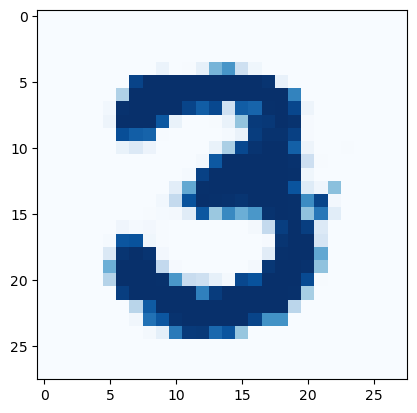

In [35]:
seed3 = seed1 + seed2
out3 = G.forward(seed3)
img3 = out3.cpu().detach().numpy().reshape(28,28)
plt.imshow(img3, cmap='Blues')
plt.show()

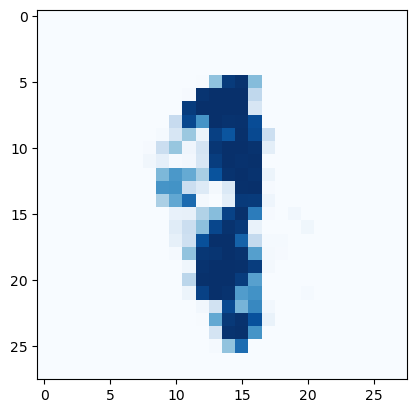

In [39]:
seed4 = seed1 - seed2
out4 = G.forward(seed4)
img4 = out4.cpu().detach().numpy().reshape(28,28)
plt.imshow(img4, cmap='Blues')
plt.show()

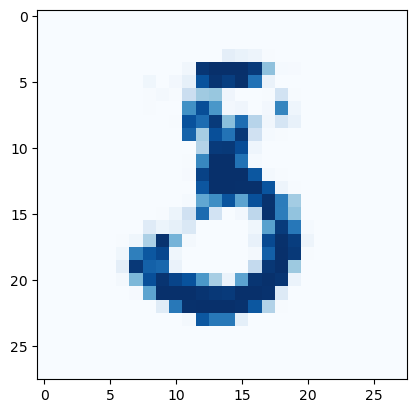

In [40]:
seed5 = seed1 * seed2
out5 = G.forward(seed5)
img5 = out5.cpu().detach().numpy().reshape(28,28)
plt.imshow(img5, cmap='Blues')
plt.show()